In [19]:
import numpy as np
import matplotlib.pyplot as plt
# from bqplot import pyplot as plt

In [3]:
rho = 1.225 # [kg/m3]
f = 1e-4  # [1/s]
p_0 = 1000  # [hPa]

In [4]:
def generate_gaussian_pressure_system(Nx, Ny, Lx, Ly, p_c, sigma):
    x, y = np.meshgrid(np.linspace(-Lx/2, Lx/2, Nx), np.linspace(-Ly/2, Ly/2, Ny))
    d = np.sqrt(x*x + y*y)
    mu = 0
    p = p_0 + (p_c - p_0)*np.exp(-((d - mu)**2 / ( 2.0 * sigma**2 )))
    return x, y, p

In [5]:
def calculate_geostrophic_velocity(x, y, p):
    u, v = np.zeros(p.shape), np.zeros(p.shape)
    dx, dy = x[0, 1] - x[0, 0], y[1, 0] - y[0, 0]
    delta_x_p, delta_y_p = np.gradient(p)
    u = - (1 / (f*rho)) * delta_x_p / dy
    v =   (1 / (f*rho)) * delta_y_p / dx
    return u, v

In [6]:
x, y, p = generate_gaussian_pressure_system(100, 100, 100e3, 100e3, 980, 20e3)
u, v  = calculate_geostrophic_velocity(x, y, p)

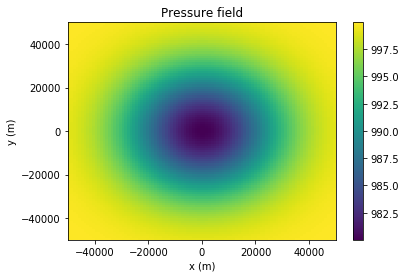

In [20]:
plt.pcolormesh(x, y, p)
plt.title("Pressure field")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar()

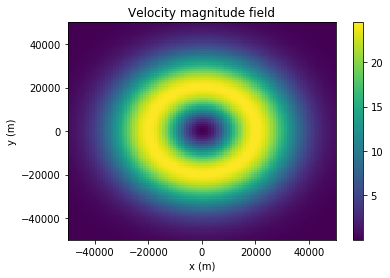

In [15]:
plt.pcolormesh(x, y, u*u + v*v)
plt.title("Velocity magnitude field")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.colorbar()

In [23]:
# plt.figure(padding_y=0)
# plt.heatmap(p)
# plt.show()

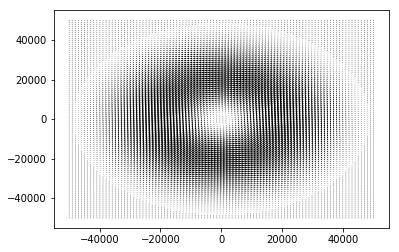

In [24]:
plt.quiver(x, y, u, v)

In [26]:
import numpy as np

from bokeh.plotting import figure, show, output_file

N = 500
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)
d = np.sin(xx)*np.cos(yy)

p = figure(x_range=(0, 10), y_range=(0, 10),
           tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])

# must give a vector of image data for image parameter
p.image(image=[d], x=0, y=0, dw=10, dh=10, palette="Spectral11")

# output_file("image.html", title="image.py example")

  # open a browser

GlyphRenderer(id='1087', ...)

In [27]:
show(p)

In [1]:
from ipywidgets import interact

@interact
def square(num=2):
    print("{} squared is {}".format(num, num*num))

interactive(children=(IntSlider(value=2, description='num', max=6, min=-2), Output()), _dom_classes=('widget-i…